In [1]:
library(ISLR)
library(gbm)
library(MASS)

set.seed(6)
train <- 1:1000
Caravan$Purchase <- ifelse(Caravan$Purchase == "Yes", 1, 0)
Caravan.train <- Caravan[train, ]
Caravan.test <- Caravan[-train, ]

Loaded gbm 2.1.5



In [2]:
set.seed(8)
boost.caravan <- gbm(Purchase ~ ., data = Caravan.train, distribution = "gaussian", n.trees = 1000, shrinkage = 0.01)

Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 50: PVRAAUT has no variation.”
Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 71: AVRAAUT has no variation.”


,var,rel.inf
,<fct>,<dbl>
PPERSAUT,PPERSAUT,13.5323309
MKOOPKLA,MKOOPKLA,11.2820861
MOPLHOOG,MOPLHOOG,6.8274615
MBERMIDD,MBERMIDD,5.5332019
PBRAND,PBRAND,4.8598648
ABRAND,ABRAND,4.3433708
MGODGE,MGODGE,4.3318631
MINK3045,MINK3045,3.8878807
PWAPART,PWAPART,2.6115989


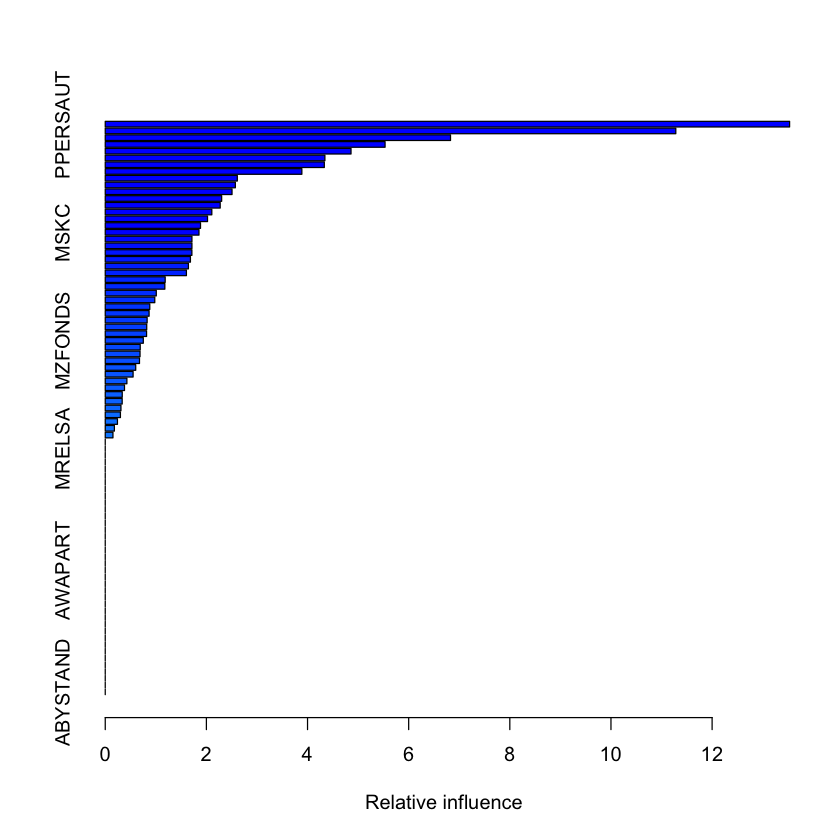

In [3]:
summary(boost.caravan)

In [4]:
probs.test <- predict(boost.caravan, Caravan.test, n.trees = 1000, type = "response")
pred.test <- ifelse(probs.test > 0.2, 1, 0)
table(Caravan.test$Purchase, pred.test)

   pred.test
       0    1
  0 4498   35
  1  279   10

In [5]:
logit.caravan <- glm(Purchase ~ ., data = Caravan.train, family = "binomial")


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [6]:
probs.test2 <- predict(logit.caravan, Caravan.test, type = "response")

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


In [7]:
pred.test2 <- ifelse(probs.test > 0.2, 1, 0)
table(Caravan.test$Purchase, pred.test2)

   pred.test2
       0    1
  0 4498   35
  1  279   10

In [ ]:
cv.carseats <- cv.tree(tree.carseats)
plot(cv.carseats$size, cv.carseats$dev, type = "b")
tree.min <- which.min(cv.carseats$dev)
points(tree.min, cv.carseats$dev[tree.min], col = "red", cex = 2, pch = 20)